In this repository we will look through a classification example based on pima indians diabetes dataset

In [2]:
# imports 
import pandas as pd

In [3]:
# importing dataset
diabetes = pd.read_csv('pima-indians-diabetes.csv')

In [4]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [5]:
diabetes.columns       # list of all columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [6]:
# normalizing data so that all data is in same form i.e diffrent datatypes of age and blood_pressure etc

cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

# can't normalize Group  cause it is a string 
#can't normalize class  cause it is required output


In [7]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x:(x-x.min())/ x.max() - x.min())

In [8]:
diabetes.head()       # normalized data

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [9]:
# import
import tensorflow as tf

In [10]:
# creating feature columns
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [11]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')

In [14]:
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [15]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])

In [16]:
# assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group',hash_bucket_size=10)

In [17]:
# converting 'Age' column to categorical column

import matplotlib.pyplot as plt
%matplotlib inline

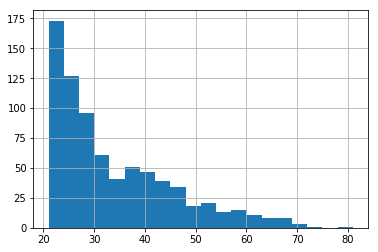

In [18]:
diabetes['Age'].hist(bins = 20)

In [19]:
age_bucket = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])

In [20]:
feat_cols = [num_preg,plasma_gluc,dias_press,tricep,insulin,bmi, diabetes_pedigree,assigned_group,age_bucket]

In [21]:
from sklearn.model_selection import train_test_splitsplit

In [22]:
x_data = diabetes.drop('Class',axis =1)      # class = 1 has diabetes   class =0 does not have diabetes

In [23]:
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [25]:
labels = diabetes['Class']

In [29]:
labels.head()

0    1
1    0
2    1
3    0
4    1
Name: Class, dtype: int64

In [27]:
X_train, X_test, y_train, y_test = train_test_split(x_data,labels, test_size=0.3, random_state=101)

In [30]:
input_func = tf.estimator.inputs.pandas_input_fn(x =X_train,y = y_train,batch_size = 10,num_epochs =1000,shuffle =True)

In [31]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes =2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\USER\\AppData\\Local\\Temp\\tmp7m4_0wvi', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001F372E7A9B0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [32]:
model.train(input_fn=input_func,steps =1000)

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\USER\AppData\Local\Temp\tmp7m4_0wvi\model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 271.378
INFO:tensorflow:loss = 4.772336, step = 101 (0.368 sec)
INFO:tensorflow:global_step/sec: 254.486
INFO:tensorflow:loss = 8.781702, step = 201 (0.394 sec)
INFO:tensorflow:global_step/sec: 346.946
INFO:tensorflow:loss = 5.330826, step = 301 (0.289 sec)
INFO:tensorflow:global_step/sec: 468.539
INFO:tensorflow:loss = 4.570435, step

In [33]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x= X_test,y=y_test,batch_size =10,num_epochs = 1,shuffle =False)

In [34]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-01-16-16:13:17
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\USER\AppData\Local\Temp\tmp7m4_0wvi\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-01-16-16:13:18
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.74025977, accuracy_baseline = 0.64935064, auc = 0.80168724, auc_precision_recall = 0.6360688, average_loss = 0.525254, global_step = 1000, label/mean = 0.35064936, loss = 5.05557, precision = 0.6666667, prediction/mean = 0.36007693, recall = 0.5185185
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\USER\AppData\Local\Temp\tmp7m4_0wvi\model.ckpt-1000


In [35]:
results

{'accuracy': 0.74025977,
 'accuracy_baseline': 0.64935064,
 'auc': 0.80168724,
 'auc_precision_recall': 0.6360688,
 'average_loss': 0.525254,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 5.05557,
 'precision': 0.6666667,
 'prediction/mean': 0.36007693,
 'recall': 0.5185185}

In [36]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x =X_test,batch_size =10,num_epochs =1 ,shuffle = False)

In [37]:
predictions = model.predict(pred_input_func)

In [39]:
my_pred = list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\USER\AppData\Local\Temp\tmp7m4_0wvi\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [40]:
my_pred

[{'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.52419966], dtype=float32),
  'logits': array([0.09687424], dtype=float32),
  'probabilities': array([0.4758004 , 0.52419966], dtype=float32)},
 {'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.62594646], dtype=float32),
  'logits': array([0.514866], dtype=float32),
  'probabilities': array([0.3740535 , 0.62594646], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.3511236], dtype=float32),
  'logits': array([-0.61410403], dtype=float32),
  'probabilities': array([0.6488764, 0.3511236], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.34833798], dtype=float32),
  'logits': array([-0.62635285], dtype=float32),
  'probabilities': array([0.651662  , 0.34833795], dtype=float32)},
 {'class_id

In [41]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes = 2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\USER\\AppData\\Local\\Temp\\tmpk26a7psx', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001F37AD8BD68>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [42]:
embedded_group_col = tf.feature_column.embedding_column(assigned_group,dimension=4)

In [43]:
feat_cols = [num_preg,plasma_gluc,dias_press,tricep,insulin,bmi, diabetes_pedigree,embedded_group_col,age_bucket]

In [44]:
input_func = tf.estimator.inputs.pandas_input_fn(X_train,y_train,batch_size = 10,num_epochs = 1000,shuffle = True)

In [50]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,20,20,20,10,10],feature_columns=feat_cols,n_classes = 2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\USER\\AppData\\Local\\Temp\\tmpzkcwct_d', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001F376DA5FD0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [51]:
dnn_model.train(input_fn=input_func,steps = 1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\USER\AppData\Local\Temp\tmpzkcwct_d\model.ckpt.
INFO:tensorflow:loss = 6.998175, step = 1
INFO:tensorflow:global_step/sec: 291.476
INFO:tensorflow:loss = 5.444346, step = 101 (0.347 sec)
INFO:tensorflow:global_step/sec: 439.768
INFO:tensorflow:loss = 5.107501, step = 201 (0.223 sec)
INFO:tensorflow:global_step/sec: 430.332
INFO:tensorflow:loss = 5.5047174, step = 301 (0.233 sec)
INFO:tensorflow:global_step/sec: 443.658
INFO:tensorflow:loss = 4.030998, step = 401 (0.224 sec)
INFO:tensorflow:global_step/sec: 462.062
INFO:tensorflow:loss = 4.3637347, step = 501 (0.218 sec)
INFO:tensorflow:global_step/sec: 453.698
INFO:tensorflow:loss = 5.266941, step = 601 (0.218 sec)
INFO:tensorflow:global_step/sec: 4

In [52]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y =y_test,batch_size = 10,num_epochs = 1,shuffle = False)

In [53]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-01-16-16:32:12
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\USER\AppData\Local\Temp\tmpzkcwct_d\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-01-16-16:32:13
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7532467, accuracy_baseline = 0.64935064, auc = 0.8288889, auc_precision_recall = 0.6971259, average_loss = 0.49571997, global_step = 1000, label/mean = 0.35064936, loss = 4.7713046, precision = 0.7, prediction/mean = 0.31634423, recall = 0.5185185
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\USER\AppData\Local\Temp\tmpzkcwct_d\model.ckpt-1000


{'accuracy': 0.7532467,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8288889,
 'auc_precision_recall': 0.6971259,
 'average_loss': 0.49571997,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 4.7713046,
 'precision': 0.7,
 'prediction/mean': 0.31634423,
 'recall': 0.5185185}